# Clustering en productos <font color = 'Fuchsia'>VANISH

Proyecto parte 3 objetivos:

- Encontrar <font color='yellow'>insights</font> relevantes para cada tipo de producto
- Ver las <font color='yellow'>mejores zonas</font> y que productos se encuentran en ellas para ver sus caracteristicas
- Identificar mejoras en productos de <font color='yellow'>rendimiento bajo</font>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition


## <font color = 'gold'> 1.- Carga y Revision de los datos

Ya <font color='yellow'> teniamos previamente un "df"</font> con los datos limpios de las empresas vamos a retomar desde <font color='yellow'>ese punto</font> para trabajar en nuestro modelo de cluster

In [8]:
df = pd.read_csv("DataFrame_final_Tarea1.csv")
#Analizando que categorias son utiles para nuestro clustering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   122002 non-null  int64  
 1   WEEK                         122002 non-null  object 
 2   ITEM_CODE                    122002 non-null  object 
 3   TOTAL_UNIT_SALES             122002 non-null  float64
 4   TOTAL_VALUE_SALES            122002 non-null  float64
 5   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 6   REGION                       122002 non-null  object 
 7   YEAR                         122002 non-null  int64  
 8   MONTH                        122002 non-null  int64  
 9   WEEK_NUMBER                  122002 non-null  int64  
 10  DATE                         122002 non-null  object 
 11  MANUFACTURER                 122002 non-null  object 
 12  BRAND                        122002 non-null  object 
 13 

## <font color = 'gold'> 2.- Seleccion de caracteristicas para el clustering

Al tener el df cargado podemos tomar en cuenta los valores de <span style="color: orange; font-weight: bold;">'TOTAL_UNIT_SALES','TOTAL_VALUE_SALES','REGION','BRAND','SEGMENT','FORMAT','ATTR1','ATTR2','ATTR3'</span> para poder hacer nuestro modelo de clustering ya que aqui podremos tomar en cuenta caracteristicas especificas de los productos de nuestra marca <span style="color: HotPink; font-weight: bold;">Vanish</span> y hacer el analisis

In [13]:
df_escogido = df[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES','REGION','BRAND','SEGMENT','FORMAT','ATTR1','ATTR2','ATTR3']]
df_escogido

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,REGION,BRAND,SEGMENT,FORMAT,ATTR1,ATTR2,ATTR3
0,0.006,0.139,TOTAL AUTOS AREA 5,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
1,0.487,116.519,TOTAL AUTOS AREA 5,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
2,1.391,68.453,TOTAL AUTOS AREA 5,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
3,0.022,1.481,TOTAL AUTOS AREA 5,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
4,2.037,182.839,TOTAL AUTOS AREA 5,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,TOTAL AUTOS SCANNING MEXICO,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
121998,1.947,235.416,TOTAL AUTOS SCANNING MEXICO,VANISH,PRETREAT,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA
121999,18.013,429.289,TOTAL AUTOS SCANNING MEXICO,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
122000,21.152,210.276,TOTAL AUTOS SCANNING MEXICO,VANISH,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA


En este proyecto nuestro enfoque es directamente con la marca <span style="color: HotPink; font-weight: bold;">Vanish</span> entonces no tiene sentido:

- Dejar otras marcas que NO sean <span style="color: HotPink; font-weight: bold;">Vanish</span>
- Dejar la columna <span style="color: orange; font-weight: bold;">'BRAND'</span>

In [16]:
df_vanish = df_escogido[df_escogido['BRAND'] == 'VANISH']
#Una vez con solo valores "Vanish" en brand, podemos eliminar esta columna del df
df_vanish = df_vanish.drop('BRAND', axis=1)
df_vanish

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,REGION,SEGMENT,FORMAT,ATTR1,ATTR2,ATTR3
0,0.006,0.139,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
1,0.487,116.519,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
2,1.391,68.453,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
3,0.022,1.481,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
4,2.037,182.839,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
...,...,...,...,...,...,...,...,...
121997,1.192,150.829,TOTAL AUTOS SCANNING MEXICO,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
121998,1.947,235.416,TOTAL AUTOS SCANNING MEXICO,PRETREAT,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA
121999,18.013,429.289,TOTAL AUTOS SCANNING MEXICO,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA
122000,21.152,210.276,TOTAL AUTOS SCANNING MEXICO,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA


## <font color = 'gold'>3.- Estandarizar las caracteristicas

Ahora que tenemos nuestro <font color='yellow'>"df_vanish"</font> limpio y optimizado vamos a empezar a plantear crear nuestro modelo de clustering, pero para eso primero debemos seguir unos cuantos pasos para que sea compatible nuestra informacion con el algoritmo:

- Convertir nuestras columnas <font color='yellow'>categoricas a numericas</font>
- Estandarizar los valores que hay en cada una de ellas para que los valores  <font color='LightCoral'>atipicos o escalas distintas</font> en nuestras columnas NO afecten el resultado
- Transformar nuestros valores a un arreglo de 2D para que el algoritmo de <font color='limegreen'>K-Means</font> pueda darnos mejores resultados


In [19]:
# Creando copia del df con sus valores categoricos
df_original = df_vanish.copy()

# Columnas categóricas a codificar
cat_columns = ['REGION', 'SEGMENT', 'FORMAT', 'ATTR1', 'ATTR2', 'ATTR3']

# Aplicar LabelEncoder a cada columna
le = LabelEncoder()
for col in cat_columns:
    df_vanish[col] = le.fit_transform(df_vanish[col])
df_vanish

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,REGION,SEGMENT,FORMAT,ATTR1,ATTR2,ATTR3
0,0.006,0.139,4,2,3,1,0,1
1,0.487,116.519,4,2,3,1,0,1
2,1.391,68.453,4,2,3,1,0,1
3,0.022,1.481,4,2,3,1,0,1
4,2.037,182.839,4,2,3,1,0,1
...,...,...,...,...,...,...,...,...
121997,1.192,150.829,6,2,3,1,0,1
121998,1.947,235.416,6,3,2,0,0,1
121999,18.013,429.289,6,2,3,1,0,1
122000,21.152,210.276,6,2,3,1,0,1


- Solo tomamos la cantidad de valores que hay en cada columna y les asignamos un numero

In [22]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el DataFrame codificado
df_vanish = scaler.fit_transform(df_vanish)
df_vanish

array([[-0.37078632, -0.53507203,  0.45086367, ...,  0.20270758,
         0.        ,  0.85371485],
       [-0.27903974,  0.2813798 ,  0.45086367, ...,  0.20270758,
         0.        ,  0.85371485],
       [-0.10660958, -0.05582224,  0.45086367, ...,  0.20270758,
         0.        ,  0.85371485],
       ...,
       [ 3.06389282,  2.47558532,  1.4364702 , ...,  0.20270758,
         0.        ,  0.85371485],
       [ 3.66262985,  0.93912232,  1.4364702 , ...,  0.20270758,
         0.        ,  0.85371485],
       [-0.09192249,  1.58241312,  1.4364702 , ...,  0.20270758,
         0.        ,  0.85371485]])

- transformamos los valores de nuestro df a un arreglo para poder transformarlos en una escala mas cercana un valor de otro para que no afecte a nuestros resultados

In [25]:
pca = decomposition.PCA(n_components=2)
pca.fit(df_vanish)
df_vanish2d=pca.transform(df_vanish)
df_vanish2d

array([[-1.25547358,  0.52456407],
       [-0.89952886,  1.00090581],
       [-0.94889612,  0.89036579],
       ...,
       [ 1.6929375 ,  3.93803129],
       [ 1.38120839,  3.35774324],
       [-0.1149317 ,  2.16475744]])

- Con el algoritmo de PCA transformarmos los valores de nuestro arreglo a uno de 2 dimensiones, para un buen funcionamiento de K-Means

## <font color = 'gold'>4.- Aplicacion del algoritmo K-Means

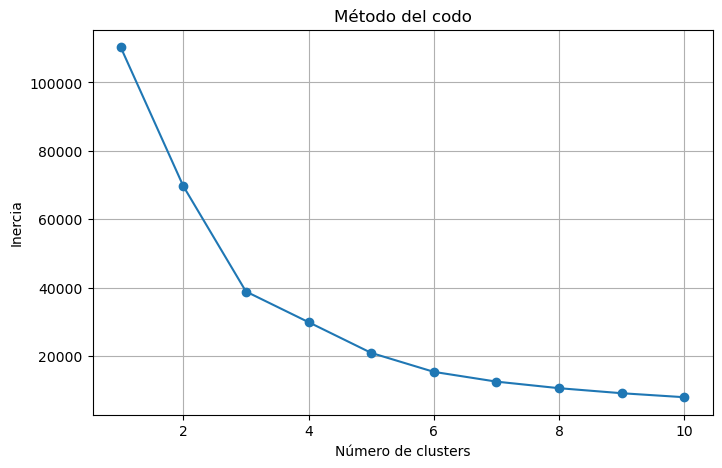

In [29]:
wcss = []  # Within-cluster sum of squares (inercia)

# Probar de 1 a 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_vanish2d)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

- Como podemos notar en la grafica del <font color='limegreen'>"Metodo del codo"</font> los cambios mas bruscos empiezan a disminuir cuando el numero de clusters es "3" por lo tanto el numero <span style="color: cyan; font-weight: bold;">Optimo de Clusters es 3</font>

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_values = kmeans.fit_predict(df_vanish2d)
print(cluster_values)

[0 0 0 ... 2 2 0]


- Asignamos los valores de los clusters en una lista a la que llamaremos <span style="color: orange; font-weight: bold;">"Cluster_values"</span> y en un momento poderla juntar con nuestro <font color='yellow'>"df_original"</font> que tenia todos los valores y caracteristicas

## <font color = 'gold'> 5.- Evaluar los resultados del clustering

In [38]:
df_original['Cluster'] = cluster_values
df_original

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,REGION,SEGMENT,FORMAT,ATTR1,ATTR2,ATTR3,Cluster
0,0.006,0.139,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0
1,0.487,116.519,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0
2,1.391,68.453,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0
3,0.022,1.481,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0
4,2.037,182.839,TOTAL AUTOS AREA 5,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,TOTAL AUTOS SCANNING MEXICO,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0
121998,1.947,235.416,TOTAL AUTOS SCANNING MEXICO,PRETREAT,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA,0
121999,18.013,429.289,TOTAL AUTOS SCANNING MEXICO,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2
122000,21.152,210.276,TOTAL AUTOS SCANNING MEXICO,POWDER,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,2


In [56]:
ventas_cluster = df_original.groupby("Cluster")[["TOTAL_UNIT_SALES", "TOTAL_VALUE_SALES"]].agg(["mean", "sum", "count"]).round(2)
ventas_cluster

TOTAL_UNIT_SALES                  TOTAL_VALUE_SALES                  
                    mean       sum  count              mean        sum  count
Cluster                                                                      
0                   0.78   9300.72  11901             48.40  575959.62  11901
1                   1.51  23013.22  15207             53.72  816932.44  15207
2                  18.14  23019.00   1269            611.03  775397.46   1269

Cada cluster nos muestra la cantidad de ventas, el valor de ellas y promedios lo que podemos ver de cada una:

- Cluster 0: Es el que tiene <font color='LightCoral'>menor cantidad de ventas</font> en relacion a las demas, sin embargo tiene una <font color='LightCoral'>alta cantidad de "productos" asignados</font> 
- Cluster 1: El <font color='yellow'>estandar de los clusters,</font> al parecer cualquier producto medio cae aqui y representa <font color='cyan'>la mayoria de nuestras ganancias</font> 
- Cluster 2: <font color='cyan'>Mejor rendimiento en cuanto a unidades vendidas relacion con su valor,</font>  ya que es el cluster con mayor cantidad de ventas pero tambien con menor cantidad de productos asignados

In [69]:
caracteristicas = ["ATTR1", "ATTR2", "ATTR3", "FORMAT"]
resumen = []

for col in caracteristicas:
    for cluster, grupo in df_original.groupby("Cluster"):
        moda = grupo[col].mode().iloc[0]
        frecuencia = (grupo[col] == moda).sum()
        resumen.append({
            "Cluster": cluster,
            "Característica": col,
            "Valor más común": moda,
            "Frecuencia": frecuencia
        })

df_resumen_moda = pd.DataFrame(resumen)
df_resumen_moda

,Cluster,Característica,Valor más común,Frecuencia
0,0,ATTR1,SAFE BLEACH,10781
1,1,ATTR1,SAFE BLEACH,15207
2,2,ATTR1,SAFE BLEACH,1269
3,0,ATTR2,FABRIC TREATMENT,11901
4,1,ATTR2,FABRIC TREATMENT,15207
5,2,ATTR2,FABRIC TREATMENT,1269
6,0,ATTR3,ROSA,7107
7,1,ATTR3,ROSA,8520
8,2,ATTR3,ROSA,787
9,0,FORMAT,POLVO,10781


 - No hay distincion en las caracteristicas del producto ya que todos manejan al parecer los mismos productos como mas populares excepto en formato, ya que hay distincion del cluster "0", esto puede deberse a la preferencia de la gente al comprarlo en polvo al ser mas barato que su version liquida, lo averiguaremos por las zonas de cada cluster

In [72]:
top_regiones = []

for cluster in df_original["Cluster"].unique():
    conteo = df_original[df_original["Cluster"] == cluster]["REGION"].value_counts().head(5)
    for region, frecuencia in conteo.items():
        top_regiones.append({
            "Cluster": cluster,
            "Región": region,
            "Frecuencia": frecuencia
        })

df_top_regiones = pd.DataFrame(top_regiones)
df_top_regiones

,Cluster,Región,Frecuencia
0,0,TOTAL AUTOS AREA 2,1797
1,0,TOTAL AUTOS AREA 5,1763
2,0,TOTAL AUTOS AREA 3,1715
3,0,TOTAL AUTOS AREA 1,1700
4,0,TOTAL AUTOS AREA 6,1673
5,1,TOTAL AUTOS AREA 2,2524
6,1,TOTAL AUTOS AREA 4,2313
7,1,TOTAL AUTOS AREA 6,2252
8,1,TOTAL AUTOS AREA 5,2115
9,1,TOTAL AUTOS AREA 3,2059


- Al parecer no hay una frecuencia o preferencia anormal en ningun area con ningun cluister, tendriamos que ver la preferencia de formato por otro camino

In [81]:
top_segmentos = []

for cluster in df_original["Cluster"].unique():
    conteo = df_original[df_original["Cluster"] == cluster]["SEGMENT"].value_counts().head(3)
    for segmento, frecuencia in conteo.items():
        top_segmentos.append({
            "Cluster": cluster,
            "Segmento": segmento,
            "Frecuencia": frecuencia
        })

df_top_segmentos = pd.DataFrame(top_segmentos)
df_top_segmentos

,Cluster,Segmento,Frecuencia
0,0,POWDER,10781
1,0,PRETREAT,1120
2,1,LIQUID & GEL,12288
3,1,BAR,2919
4,2,LIQUID & GEL,735
5,2,POWDER,374
6,2,BAR,160


- Y como vemos los clusters 1 y 2 tienen semejanzas a los productos que venden, mientras que cluster 0 tiene los productos mas economicos, aun asi averiguaremos que productos tiene cluster 2

### <font color = 'pink'> Primeras conclusiones

Podemos notar que en <font color = 'cyan'>cluster 2 hay una cantidad de ventas mucho mayor</font> a lo que esperariamos al estar presente en solo 2 zonas, esto puede ser o que esta en una zona con ingresos medios mucho mas altos a lo normal y que podrian hacer <font color = 'cyan'>compras con precios mas elevados,</font> hay alguna empresa que compra cantidades demasiado grandes, ya que la cantidad de ventas son muy elevadas para los pocos productos que son o que los productos adjuntos en este cluster tienen un desempeño mucho mejor

<font color = 'yellow'>Averiguaremos mas sobre los productos en especifico en "cluster 2"</font> para saber que enfoque le tenemos que dar a nuestros peores productos o nuestras zonas

## <font color = 'gold'> 6.- Visualizar los clusters

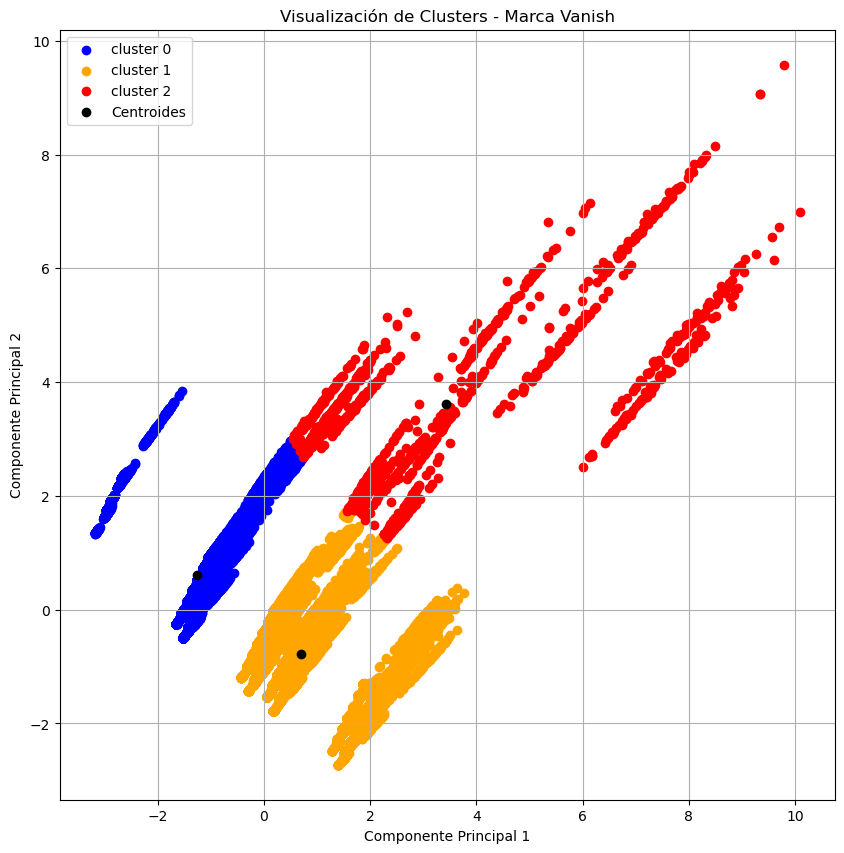

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(df_vanish2d[cluster_values==0,0], df_vanish2d[cluster_values==0,1], c = 'blue', label = 'cluster 0')
plt.scatter(df_vanish2d[cluster_values==1,0], df_vanish2d[cluster_values==1,1], c = 'orange', label = 'cluster 1')
plt.scatter(df_vanish2d[cluster_values==2,0], df_vanish2d[cluster_values==2,1], c = 'red', label = 'cluster 2')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black',label='Centroides')


plt.title('Visualización de Clusters - Marca Vanish')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

- La distribucion de nuestros clusters se nota una notable mejoria en los productos de <span style="color: orange; font-weight: bold;">"Cluster 2"</span>

<Axes: title={'center': 'Cantidad de Productos por Cluster'}, xlabel='Cluster'>

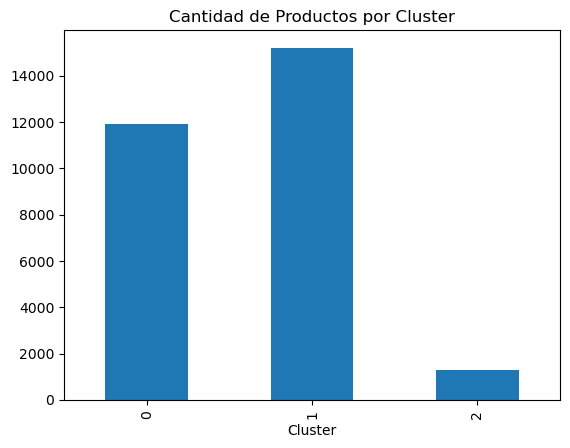

In [126]:
conteo = df_original["Cluster"].value_counts().sort_index()
conteo.plot(kind='bar', title="Cantidad de Productos por Cluster")

- Confirmamos que hay una cantidad minima en este cluster, que aqui hay algo que podemos mejorar para tener ventas mas algas con los productos en otros clusters

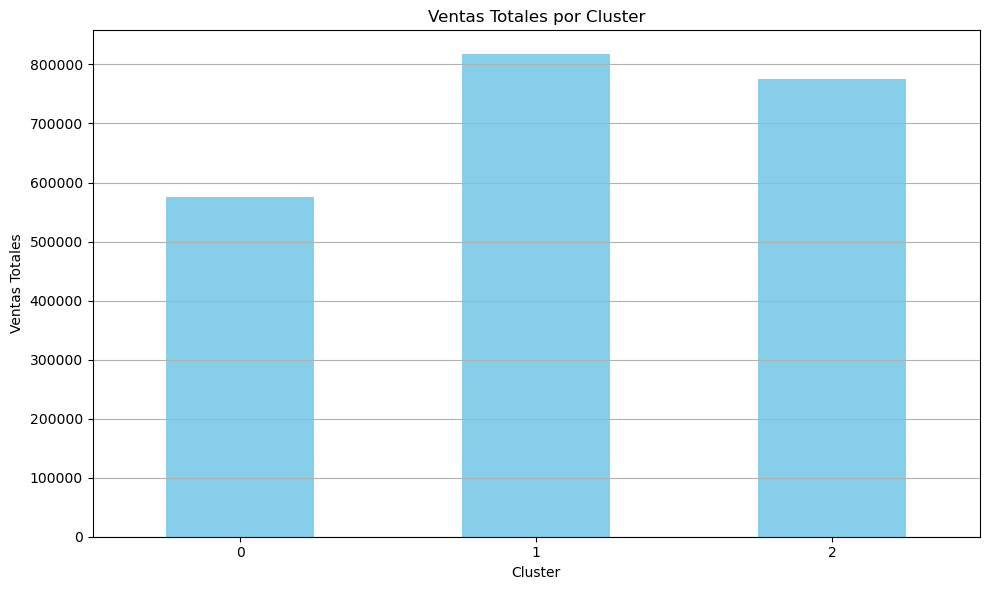

In [140]:
ventas_totales = df_original.groupby("Cluster")["TOTAL_VALUE_SALES"].sum()

ventas_totales.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Ventas Totales por Cluster")
plt.ylabel("Ventas Totales")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Volvemos a ver al relacion de ventas en comparacion de la cantidad de productos

In [162]:
cluster_2 = df_original[df_original["Cluster"] == 2]
top_5 = cluster_2.sort_values(by="TOTAL_VALUE_SALES", ascending=False).head(5)


top_5[["REGION","ATTR1", "ATTR2", "ATTR3", "FORMAT", "SEGMENT", "TOTAL_VALUE_SALES"]]

,REGION,ATTR1,ATTR2,ATTR3,FORMAT,SEGMENT,TOTAL_VALUE_SALES
41335,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,LIQUIDO,LIQUID & GEL,1624.247
86289,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,LIQUIDO,LIQUID & GEL,1371.109
1567,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,LIQUIDO,LIQUID & GEL,1369.710
14659,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,LIQUIDO,LIQUID & GEL,1367.002
63764,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,GEL,LIQUID & GEL,1355.454


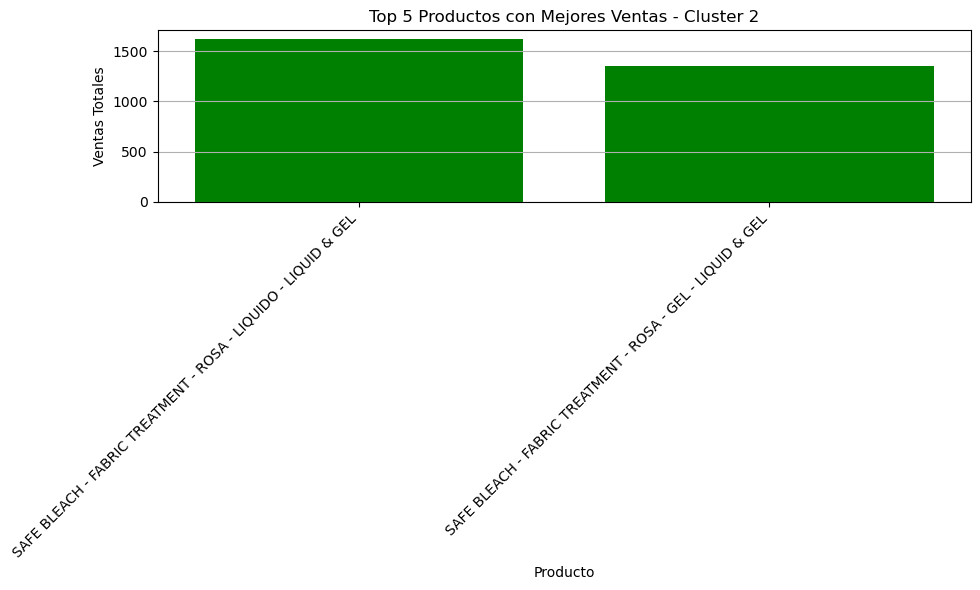

In [166]:
top_5["Producto"] = (top_5["ATTR1"] + " - " + top_5["ATTR2"] + " - " + top_5["ATTR3"] + " - " + top_5["FORMAT"] + " - " + (top_5["SEGMENT"]))

plt.figure(figsize=(10,6))
plt.bar(top_5["Producto"], top_5["TOTAL_VALUE_SALES"], color="green")
plt.title("Top 5 Productos con Mejores Ventas - Cluster 2")
plt.xlabel("Producto")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Despues de hacer este "TOP 5 de mejores productos" quedo claro que: <span style="color: orange; font-weight: bold;">"TOTAL AUTOS SCANNING MEXICO, SAFE BLEACH, FABRIC TREATMENT, ROSA ,LIQUIDO, LIQUID & GEL"</span> <font color = 'cyan'>son las mejores caracteristicas de productos</font> ya que son las mas vendidas en nuestra marca y que podriamos empezar a replicar.

Ahora <font color = 'limegreen'>¿Cuales son los productos que necesitan mejora?

In [145]:
cluster_0 = df_original[df_original["Cluster"] == 0]
bottom_5 = cluster_0.sort_values(by="TOTAL_VALUE_SALES", ascending=True).head(5)

bottom_5[["REGION","ATTR1", "ATTR2", "ATTR3", "FORMAT", "SEGMENT", "TOTAL_VALUE_SALES"]]

,REGION,ATTR1,ATTR2,ATTR3,FORMAT,SEGMENT,TOTAL_VALUE_SALES
119571,TOTAL AUTOS AREA 2,SAFE BLEACH,FABRIC TREATMENT,BLANCO,POLVO,POWDER,0.001
120089,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,BLANCO,POLVO,POWDER,0.001
86157,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POLVO,POWDER,0.005
119599,TOTAL AUTOS AREA 2,SAFE BLEACH,FABRIC TREATMENT,ROSA,POLVO,POWDER,0.005
47287,TOTAL AUTOS SCANNING MEXICO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POLVO,POWDER,0.007


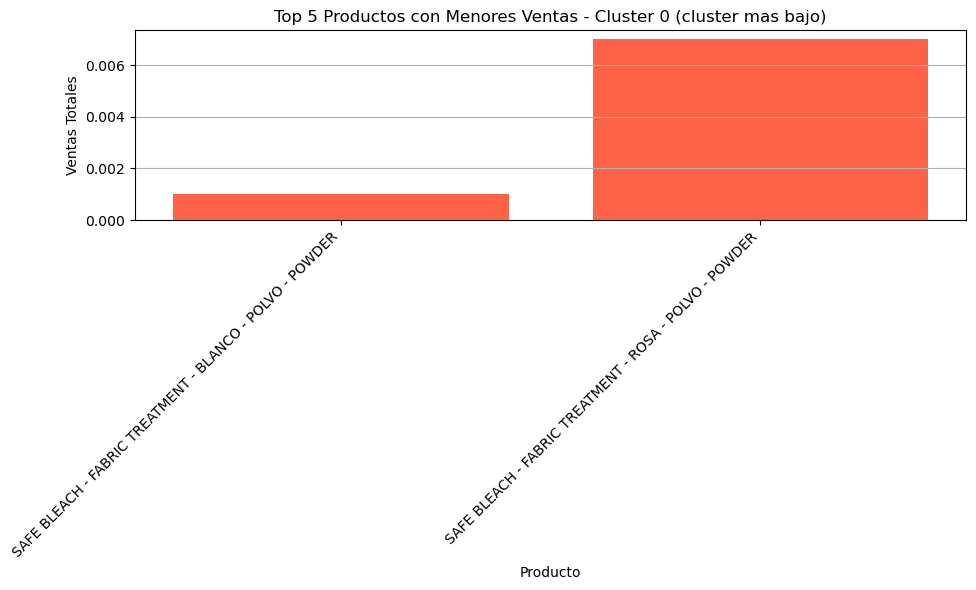

In [158]:
bottom_5["Producto"] = (bottom_5["ATTR1"] + " - " + bottom_5["ATTR2"] + " - " + bottom_5["ATTR3"] + " - " + bottom_5["FORMAT"] + " - " + (bottom_5["SEGMENT"]))

plt.figure(figsize=(10,6))
plt.bar(bottom_5["Producto"], bottom_5["TOTAL_VALUE_SALES"], color="tomato")
plt.title("Top 5 Productos con Menores Ventas - Cluster 0 (cluster mas bajo)")
plt.xlabel("Producto")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## <font color = 'pink'> Conclusiones Finales

Tenemos puntos de mejora para nuestros productos debemos investigar el porque:

- El producto mas popular es blanqueador, pero porque solo en su version rosa liquido? tanta diferencia hay con la version en polvo?
- Tenemos que darle prioridad al area de "TOTAL AUTOS SCANNING MEXICO" ya que es donde esta nuestra mayor cantidad de ventas
- Podriamos replicar estas ventas en otras areas? o podriamos hacer un analisis mas exacto de que producto es mas exitoso segun el area, por el momento podriamos intentar replicar las ventas que hay en "TOTAL AUTOS SCANNING MEXICO"
- Debemos prestar atencion en las areas de "TOTAL AUTOS AREA 2" ya que representan de las areas con menos ventas